In [1]:
import pandas as pd
import pickle as pkl
import numpy as np
from emle_bespoke._constants import HARTREE_TO_KJ_MOL

In [2]:
import emle

emle.__path__

['/home/joaomorado/repos/emle-engine-myfork/emle']

In [3]:
df = pd.read_csv("/home/joaomorado/mnsol_sampling/LJ/DESS66x8.csv")

In [4]:
monomer_a = "CO"
monomer_b = "O"
df_mol = df.loc[(df["smiles0"] == monomer_a) & (df["smiles1"] == monomer_b)]
df_mol

,smiles0,smiles1,charge0,charge1,natoms0,natoms1,system_id,group_orig,group_id,k_index,...,sapt_exdisp_ss,sapt_delta_HF,sapt_all,nn_CCSD(T)_all,nn_CCSD(T)_all_05,nn_CCSD(T)_all_95,xyz,elements,reference,system_name
8,CO,O,0,0,6,3,15449,S66x8,3057611,-10,...,0.31846,-2.49040,-6.24050,-5.32178,-5.40330,-5.23358,2.62978 -0.425 -1.20185 2.16478 0.04663 0.0603...,C O H H H H O H H,-5.232,2_WaterMeOH
9,CO,O,0,0,6,3,15449,S66x8,3057611,-5,...,0.23527,-1.66375,-6.33828,-5.64972,-5.71656,-5.57915,2.72762 -0.42573 -1.19441 2.26261 0.0459 0.067...,C O H H H H O H H,-5.578,2_WaterMeOH
10,CO,O,0,0,6,3,15449,S66x8,3057611,0,...,0.17372,-1.11801,-6.17383,-5.64564,-5.70771,-5.58041,2.82535 -0.42646 -1.18698 2.36034 0.04517 0.07...,C O H H H H O H H,-5.589,2_WaterMeOH
11,CO,O,0,0,6,3,15449,S66x8,3057611,5,...,0.12793,-0.76600,-5.85874,-5.44461,-5.50126,-5.38559,2.92328 -0.42719 -1.17953 2.45827 0.04444 0.08...,C O H H H H O H H,-5.396,2_WaterMeOH
12,CO,O,0,0,6,3,15449,S66x8,3057611,10,...,0.09389,-0.54347,-5.46601,-5.12794,-5.17733,-5.07602,3.02111 -0.42792 -1.1721 2.55611 0.04371 0.090...,C O H H H H O H H,-5.086,2_WaterMeOH
13,CO,O,0,0,6,3,15449,S66x8,3057611,25,...,0.03590,-0.24860,-4.19467,-3.97005,-4.00280,-3.93755,3.31461 -0.43011 -1.14978 2.8496 0.04152 0.112...,C O H H H H O H H,-3.947,2_WaterMeOH
14,CO,O,0,0,6,3,15449,S66x8,3057611,50,...,0.00643,-0.09882,-2.54273,-2.39741,-2.41639,-2.37894,3.80377 -0.43376 -1.1126 3.33877 0.03787 0.149...,C O H H H H O H H,-2.385,2_WaterMeOH
15,CO,O,0,0,6,3,15449,S66x8,3057611,100,...,0.00019,-0.01613,-1.03520,-0.95809,-0.96802,-0.94794,4.78209 -0.44107 -1.03822 4.31709 0.03056 0.22...,C O H H H H O H H,-0.952,2_WaterMeOH
56,CO,O,0,0,6,3,15449,S66x8,3057608,-10,...,0.25520,-2.17751,-5.56306,-4.64589,-4.71530,-4.57366,-1.24799 -1.29028 0.00108 -0.78656 0.04517 -0....,C O H H H H O H H,-4.629,8_MeOHWater
57,CO,O,0,0,6,3,15449,S66x8,3057608,-5,...,0.18905,-1.42749,-5.70125,-4.98531,-5.04707,-4.92121,-1.24799 -1.29028 0.00108 -0.78656 0.04517 -0....,C O H H H H O H H,-4.985,8_MeOHWater


In [5]:
data_dict = {
    "xyz_qm": [],
    "xyz_mm": [],
    "z": [],
    "charges_mm": [],
    "e_int": [],
    "solute_mask": [],
    "solvent_mask": [],
}

energies = []
for i in range(len(df_mol)):
    xyz_dimer = np.asarray(df_mol.iloc[i]["xyz"].split(" "), dtype=float).reshape(-1, 3)

    data_dict["xyz_mm"].append(xyz_dimer[6:] * 0.1)
    data_dict["xyz_qm"].append(xyz_dimer[:6] * 0.1)
    data_dict["z"].append([6, 8, 1, 1, 1, 1])
    data_dict["charges_mm"].append([-0.834, 0.417, 0.417])
    data_dict["e_int"].append(df_mol.iloc[i]["cbs_CCSD(T)_all"] * 4.184)
    data_dict["solute_mask"].append(np.asarray([True] * 6 + [False] * 3))
    data_dict["solvent_mask"].append(np.asarray([False] * 6 + [True] * 3))
    """
    data_dict["xyz_mm"].append(xyz_dimer[:3] * 0.1)
    data_dict["xyz_qm"].append(xyz_dimer[3:] * 0.1)
    data_dict["z"].append([6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1])
    data_dict["charges_mm"].append([-0.834, 0.417, 0.417])
    data_dict["e_int"].append(df_mol.iloc[i]["cbs_CCSD(T)_all"] * 4.184)
    data_dict["solute_mask"].append(np.asarray([True] * 12 + [False] * 3))
    data_dict["solvent_mask"].append(np.asarray([False] * 12 + [True] * 3))
    """

In [6]:
with open("/home/joaomorado/mnsol_sampling/LJ/water-methanol.pkl", "wb") as f:
    pkl.dump(data_dict, f)

In [7]:
dimer_curve = np.loadtxt("/home/joaomorado/mnsol_sampling/LJ/dimer_curve.dat")

benzene = -232.198277015159 * HARTREE_TO_KJ_MOL
water = -76.423403200485 * HARTREE_TO_KJ_MOL

dimer_curve = dimer_curve - benzene - water

In [8]:
from emle_bespoke.patching import EMLEPatched as EMLE
import torch as _torch

model = EMLE()
z = _torch.tensor(data_dict["z"], dtype=_torch.int64)
xyz_qm = _torch.tensor(data_dict["xyz_qm"], dtype=_torch.float32) * 10.0
xyz_mm = _torch.tensor(data_dict["xyz_mm"], dtype=_torch.float32) * 10.0
charges_mm = _torch.tensor(data_dict["charges_mm"], dtype=_torch.float32)

e_static, e_ind = model(z, charges_mm, xyz_qm, xyz_mm)
e_int_emle = e_static + e_ind
e_int_emle = e_int_emle * HARTREE_TO_KJ_MOL

/home/joaomorado/opt/micromamba/envs/emle-bespoke/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indi

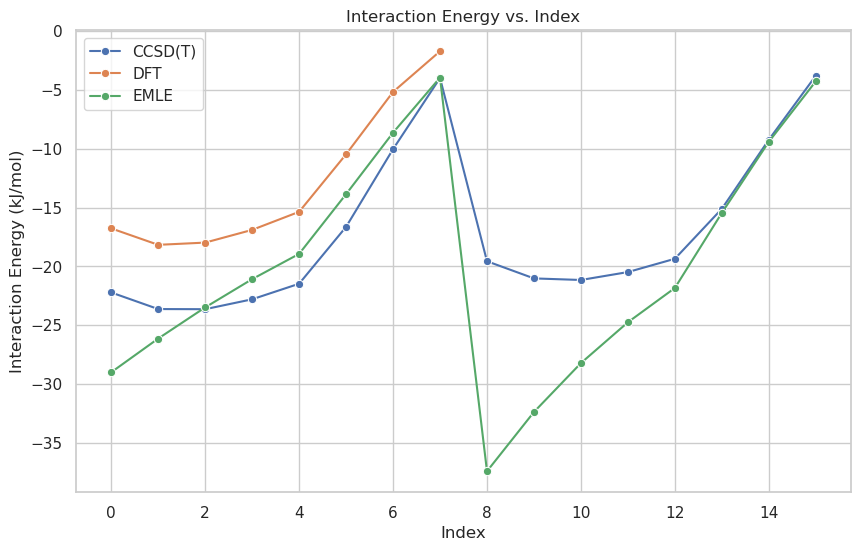

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=range(len(data_dict["e_int"])), y=data_dict["e_int"], marker="o", label="CCSD(T)"
)
sns.lineplot(x=range(len(dimer_curve)), y=dimer_curve, marker="o", label="DFT")
sns.lineplot(
    x=range(len(e_int_emle)), y=e_int_emle.detach().numpy(), marker="o", label="EMLE"
)
plt.xlabel("Index")
plt.ylabel("Interaction Energy (kJ/mol)")
plt.title("Interaction Energy vs. Index")
plt.show()

In [10]:
# Write xyz files
row_nr = 0
for row in df_mol.iterrows():
    row = row[1]
    xyz = np.asarray(row["xyz"].split(" "), dtype=float).reshape(-1, 3)
    with open(
        f"/home/joaomorado/mnsol_sampling/LJ/benzene-methanol-{row_nr}.xyz", "w"
    ) as f:
        f.write(f"{len(xyz)}\n\n")
        for i, atom in enumerate(xyz):
            msg = f"{row['elements'].split()[i]} {atom[0]} {atom[1]} {atom[2]}\n"
            f.write(msg)
    row_nr += 1